In [6]:
#all the librarys required
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
#import pydotplus
#import graphviz
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
#from sklearn.externals.six import StringIO
#from pydot import graph_from_dot_data
from sklearn.utils import resample
from sklearn.tree import export_graphviz
#import pydot
import random

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/mercy98/STRINGS/master/startup.csv' , encoding='ISO-8859-1')
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [9]:
data.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [10]:
print("Check null values")
data.isnull().sum()

Check null values


permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [11]:
 #Drop irrelevant columns
columns_to_drop = ['permalink', 'name', 'homepage_url', ' market ', 'founded_month', 'founded_quarter', 'first_funding_at', 'last_funding_at']
data = data.drop(columns_to_drop, axis=1)
# Print the remaining columns
data.columns

Index(['category_list', ' funding_total_usd ', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [12]:
# Handle missing values
data = data.dropna(subset=['category_list', 'founded_at'])  # Drop rows with missing values in critical columns
data[' funding_total_usd '] = pd.to_numeric(data[' funding_total_usd '].str.replace(',', ''), errors='coerce')
data['founded_year'] = pd.to_numeric(data['founded_year'], errors='coerce')

In [13]:
# Fill NaN values in 'founded_year' with a default value
data['founded_year'] = data['founded_year'].fillna(data['founded_year'].median().round())

In [14]:
# Convert 'founded_at' to datetime format
data['founded_at'] = pd.to_datetime(data['founded_at'], format='%Y-%m-%d', errors='coerce')

# Feature engineering
data['startup_age'] = (pd.to_datetime('today') - data['founded_at']).dt.days // 365
data['startup_age'] = data['startup_age'].fillna(0)  # Fill NaT values with 0
data['total_funding'] = data[['seed', 'venture', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum(axis=1)


In [15]:
data.describe()

,funding_total_usd,funding_rounds,founded_at,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,startup_age,total_funding
count,3.104200e+04,36565.000000,36564,36565.000000,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,...,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,3.656500e+04,36565.000000,3.656500e+04
mean,1.687148e+07,1.829701,2007-05-30 02:28:33.160485632,2007.421578,2.533158e+05,8.509345e+06,6.343270e+03,9.745311e+04,2.530426e+04,2.065755e+06,...,1.367703e+06,1.755273e+06,1.460156e+06,9.311352e+05,4.331819e+05,2.211835e+05,7.787458e+04,1.924244e+04,16.499822,1.502841e+07
min,2.200000e+01,1.000000,1802-07-19 00:00:00,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.780000e+05,1.000000,2005-12-01 00:00:00,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12.000000,0.000000e+00
50%,2.000000e+06,1.000000,2009-12-01 00:00:00,2009.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14.000000,7.250000e+05
75%,1.010000e+07,2.000000,2012-01-01 00:00:00,2012.000000,5.000000e+04,5.594387e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,9.000000e+06
max,3.007950e+10,18.000000,2014-12-13 00:00:00,2014.000000,1.000000e+08,2.351000e+09,1.700000e+07,2.508000e+08,3.000000e+08,3.007950e+10,...,2.250000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,221.000000,4.702000e+09
std,1.860007e+08,1.401163,NaN,7.259593,9.665744e+05,3.172752e+07,1.782900e+05,2.232620e+06,1.608646e+06,1.592713e+08,...,5.392548e+06,8.233263e+06,8.927400e+06,1.126754e+07,6.156502e+06,7.278062e+06,6.107148e+06,3.159113e+06,9.222883,6.080803e+07


In [44]:
data

Index(['category_list', ' funding_total_usd ', 'status', 'city',
       'funding_rounds', 'founded_at', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding',
       ...
       'region_Zafirovo', 'region_Zagreb', 'region_Zanzibar Urban',
       'region_Zaragoza', 'region_Zhengzhou', 'region_Zhuhai', 'region_Zurich',
       'region_Çan', 'region_Évry', 'region_nan'],
      dtype='object', length=1186)

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])


In [17]:
categorical_columns = ['country_code', 'state_code', 'region']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
data_categorical = one_hot_encoder.fit_transform(data[categorical_columns])
data_categorical = pd.DataFrame(data_categorical.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), data_categorical], axis=1)

In [18]:
data.dropna(inplace =True)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Split the data into features (X) and target variable (y)
X = data.drop('status', axis=1)
y = data['status']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numerical_transformer = 'passthrough'
categorical_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder())
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'data' is your DataFrame

# Numerical columns imputation
num_imputer = SimpleImputer(strategy='median')
data[[' funding_total_usd ', 'funding_rounds', 'founded_year']] = num_imputer.fit_transform(data[[' funding_total_usd ', 'funding_rounds', 'founded_year']])

# Categorical columns imputation
data['category_list'].fillna('Unknown', inplace=True)
data['city'].fillna('Unknown', inplace=True)

# One-hot encoded regions
one_hot_columns = data.columns[data.columns.str.startswith('region_')]
data[one_hot_columns] = data[one_hot_columns].fillna(0)

# Handling 'founded_at' if deciding to drop or impute
data = data.dropna(subset=['founded_at'])


C:\Users\hp\AppData\Local\Temp\ipykernel_14312\1433970280.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category_list'].fillna('Unknown', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14312\1433970280.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [22]:
from sklearn.impute import SimpleImputer
# categorical data that needs imputation
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [23]:
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [24]:
from sklearn.pipeline import make_pipeline

# Logistic Regression pipeline
lr_pipeline = make_pipeline(preprocessor, LogisticRegression())

# Train the logistic regression model
lr_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the logistic regression model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))


c:\Users\hp\Deployment_Startups\.venve\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.8353802550779404
Precision: 0.237395899219903
Recall: 0.25052656161872533
F1 Score: 0.23019949210402507


c:\Users\hp\Deployment_Startups\.venve\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


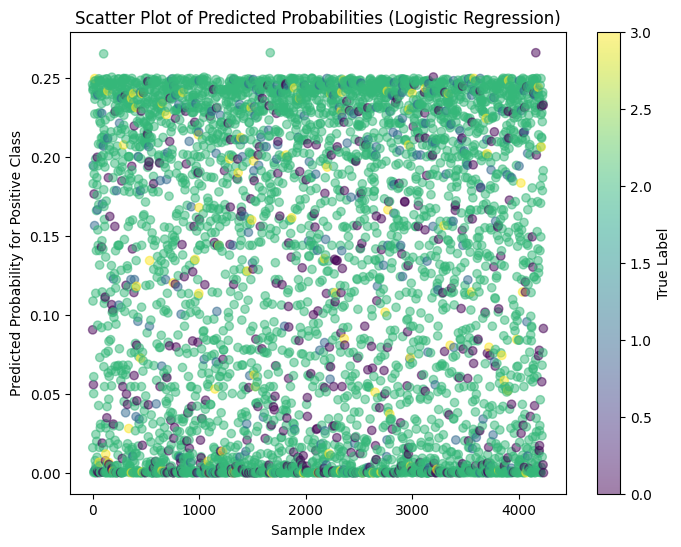

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate predicted probabilities for each class
y_prob_lr = lr_pipeline.predict_proba(X_test)

# Extract probabilities for the positive class
positive_class_prob = y_prob_lr[:, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(positive_class_prob)), positive_class_prob, c=y_test, cmap='viridis', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability for Positive Class')
plt.title('Scatter Plot of Predicted Probabilities (Logistic Regression)')
plt.colorbar(label='True Label')
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree pipeline
dt_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier())

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))


Decision Tree Performance:
Accuracy: 0.7817666509211147
Precision: 0.304094361708593
Recall: 0.28312646952990045
F1 Score: 0.2879485140167536


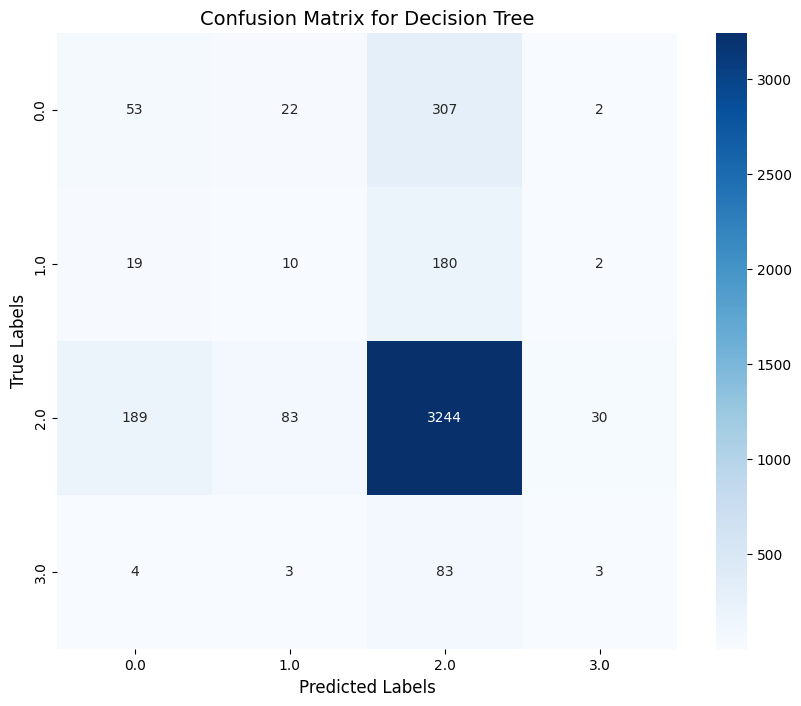

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)


# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(10, 8))
df_cm_dt = pd.DataFrame(cm_dt, index=np.unique(y_test), columns=np.unique(y_pred_dt))
sns.heatmap(df_cm_dt, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix for Decision Tree', fontsize=14)
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier())

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))


Random Forest Performance:
Accuracy: 0.8377420878601795
Precision: 0.3595057933317569
Recall: 0.25181212105188944
F1 Score: 0.23176600897676458


c:\Users\hp\Deployment_Startups\.venve\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


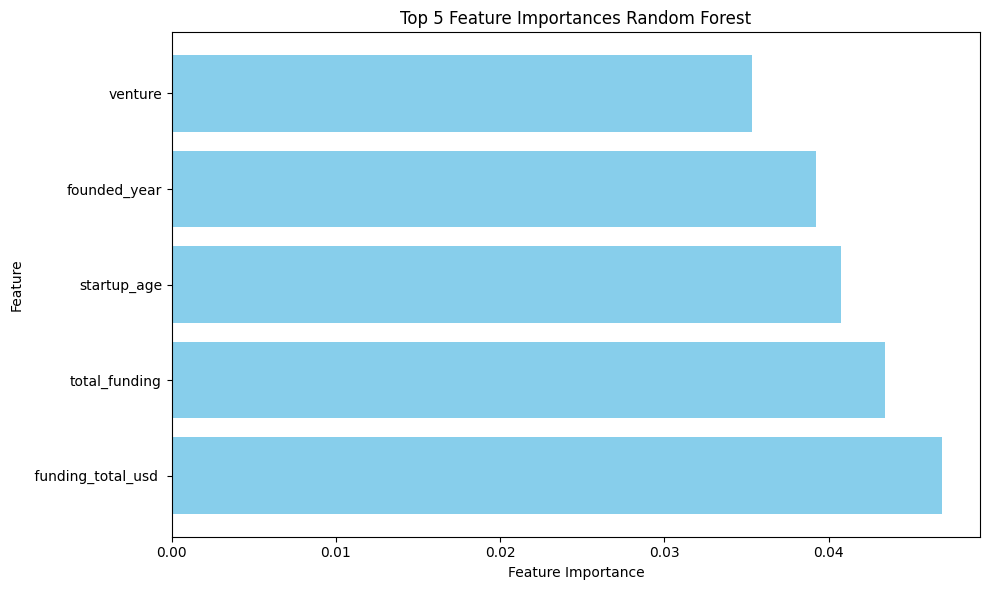

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Get feature importances
feature_importances = rf_pipeline.named_steps['randomforestclassifier'].feature_importances_

# Get feature names from preprocessor (assuming preprocessor is a ColumnTransformer)
categorical_features = lr_pipeline.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out()
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns
feature_names = np.concatenate([numerical_features, categorical_features])

# Sort feature importances and select top 5 features
top_indices = feature_importances.argsort()[-5:][::-1]
top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]

# Plot feature importances for top 5 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center', color='skyblue')
plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances Random Forest')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import MaxAbsScaler

# Neural Network pipeline with MaxAbsScaler for sparse input
nn_pipeline = make_pipeline(preprocessor, MaxAbsScaler(), MLPClassifier())

# Train the Neural Network model
nn_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_pipeline.predict(X_test)

# Evaluate the model
print("Neural Network Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_nn, average='macro'))


c:\Users\hp\Deployment_Startups\.venve\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Performance:
Accuracy: 0.7564950401511573
Precision: 0.28190380749097627
Recall: 0.27244177868488306
F1 Score: 0.27520043009559975


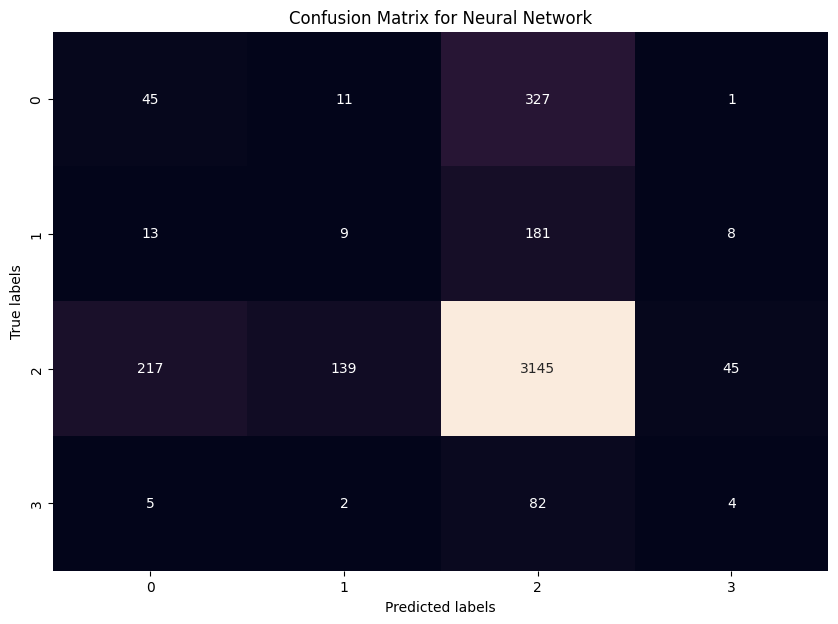

In [31]:
# Generate the confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)
# Plotting the confusion matrix for the Neural Network model
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Neural Network')
plt.show()


In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Assuming `preprocessor` is already defined as per your previous models
svm_pipeline = make_pipeline(preprocessor, SVC())

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate the SVM model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))


SVM Performance:
Accuracy: 0.8375059045819556
Precision: 0.2093764761454889
Recall: 0.25
F1 Score: 0.22789203084832904


c:\Users\hp\Deployment_Startups\.venve\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
!pip install joblib


You should consider upgrading via the 'C:\Users\hp\Deployment_Startups\.venve\Scripts\python.exe -m pip install --upgrade pip' command.


In [37]:
from joblib import dump

# Save the trained model
dump(svm_pipeline, 'svm_model.joblib')

['svm_model.joblib']

In [38]:
from joblib import load

# Load the saved model
svm_model = load('svm_model.joblib')


In [42]:
input_data = np.array([30000, 6, 20000]).reshape(-1, 1)
input = [[30000, 6, 20000]]
out = svm_model.predict(input)
out

ValueError: X has 3 features, but ColumnTransformer is expecting 1185 features as input.

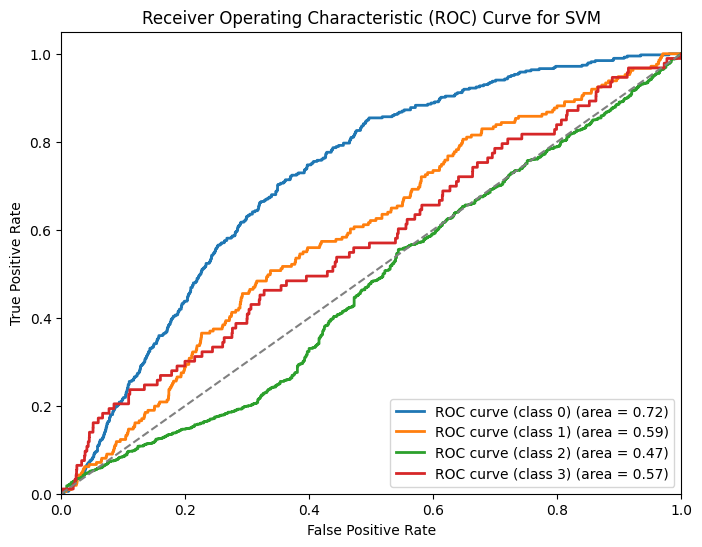

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Calculate the probabilities for each class
y_scores_svm = svm_pipeline.decision_function(X_test)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(svm_pipeline.classes_)):
    fpr, tpr, _ = roc_curve(y_test == svm_pipeline.classes_[i], y_scores_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc))

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()
